In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the country reference file
df_countries = pd.read_csv("CT_COUNTRIES.csv", sep=";", header=None, names=["code", "lang", "name"])

country_dict = df_countries.set_index("code")["name"].to_dict()

In [4]:
import pandas as pd
import io

FILE_PATH = "D:\data\EXPORT_DATA_envoi_01_01_2022_30_04_2025.csv"
TARGET_BYTES = 1 * 1024**3          # 1 GB
ENCODING = "utf-8-sig"              # <- handles UTF-8 + BOM correctly

def load_first_gb(path, target_bytes=TARGET_BYTES, **read_kwargs):
    """Return a DataFrame containing (a little under) `target_bytes` worth of data."""
    buffers = []
    bytes_so_far = 0

    with open(path, "rb") as f:             # binary mode so we can count raw bytes
        header = f.readline()               # keep header line
        bytes_so_far += len(header)
        buffers.append(header)

        # stream line by line until we cross the target
        for line in f:
            bytes_so_far += len(line)
            if bytes_so_far > target_bytes:
                break
            buffers.append(line)

    # glue the captured bytes into an in-memory file-like object
    pseudo_file = io.BytesIO(b"".join(buffers))

    df = pd.read_csv(
        pseudo_file,
        sep=";",
        encoding=ENCODING,
        on_bad_lines="skip",
        dtype=str,
        low_memory=False,
        **read_kwargs,
    )

    # nuke any BOM that sneaked into the first column name
    df.columns = df.columns.str.lstrip("\ufeff")

    return df

# --------- grab the first ≈1 GB ---------
df = load_first_gb(FILE_PATH)
print(df.shape)
df.head()


(10103605, 7)


,RECPTCL_FID,MAILITM_FID,EVENT_TYPE_NM,date,établissement_postal,EVENT_TYPE_CD,next_établissement_postal
0,NaN,CC021659473ES,Insérer envoi dans sac (Srt),2024-01-31 20:11:00.000,ESPAGNE,8,NaN
1,NaN,CC021662747ES,Réception d'envoi du client (Srt),2024-01-31 12:31:00.000,ESPAGNE,1,NaN
2,NaN,CC021662747ES,Insérer envoi dans sac (Srt),2024-02-05 12:46:00.000,ESPAGNE,8,NaN
3,NaN,CC021663328ES,Réception d'envoi du client (Srt),2024-01-31 13:51:00.000,ESPAGNE,1,NaN
4,NaN,CC021663328ES,Insérer envoi dans sac (Srt),2024-02-01 12:32:00.000,ESPAGNE,8,NaN


In [11]:
last_row_df  = df.tail(1)   # last_row_df.shape  == (1, df.shape[1])
last_row_df

,RECPTCL_FID,MAILITM_FID,EVENT_TYPE_NM,date,établissement_postal,EVENT_TYPE_CD,next_établissement_postal
10103604,SGSINBDZALGDAUR32033002010102,RB309881552SG,Expédition d'envoi à l'étranger (EDI-reçu),2023-10-08 12:15:00.000,SINGAPOUR,12,ALGÉRIE


In [4]:
distinct_values_count = df.nunique()

distinct_values_count = distinct_values_count.sort_values(ascending=True)

print(distinct_values_count)

EVENT_TYPE_NM                     22
EVENT_TYPE_CD                     22
next_établissement_postal       2536
établissement_postal            2702
RECPTCL_FID                   122553
date                          991652
MAILITM_FID                  4574584
dtype: int64


In [11]:
print("the number of not missing bags is", 10103605 - 6909038)

the number of not missing bags is 3194567


In [4]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

RECPTCL_FID                  6909038
établissement_postal         3961916
next_établissement_postal    6651105
dtype: int64


In [12]:

# Assuming 'df' is your DataFrame!

# Identify the rows with missing values
missing_rows = df[df.isnull().any(axis=1)]

# Print the total number of rows that have missing values
print("Total rows with missing values:", missing_rows.shape[0])




Total rows with missing values: 8186746


In [13]:
# Analyze the missing patterns across rows:
# Create a binary pattern for each row where 1 indicates a missing value and 0 indicates non-missing.
missing_pattern = missing_rows.isnull().astype(int)
# Convert each pattern to a tuple to use as a key for groupby
missing_pattern_tuples = missing_pattern.apply(tuple, axis=1)
# Group by the missing pattern and count the number of rows for each pattern
pattern_summary = missing_rows.groupby(missing_pattern_tuples).size().sort_values(ascending=False)

print("\nSummary of missing patterns (tuple of 0's and 1's corresponding to missing values in each column):")
print(pattern_summary)




Summary of missing patterns (tuple of 0's and 1's corresponding to missing values in each column):
(1, 0, 0, 0, 0, 0, 1)    3966897
(1, 0, 0, 0, 1, 0, 1)    2684208
(0, 0, 0, 0, 1, 0, 0)    1277708
(1, 0, 0, 0, 0, 0, 0)     257933
dtype: int64


In [6]:
unique_vals = df['next_établissement_postal'].dropna().unique()
for v in unique_vals:
    print(repr(v))

'AVION CPX ALGER'
'ANNABA EL MARSA'
'EL BOUNI'
'CONSTANTINE COLIS POSTAUX'
'CTR BISKRA'
'CHETMA'
'CDD JIJEL'
'JIJEL-OULED-AISSA'
'CITE MARTYRS'
'CDD BISKRA'
'CDD FERDJIOUA'
'ALGER GARE'
'CDD BOUIRA'
'TAMALOUS'
'HAD-SAHARY'
'ORAN COLIS POSTAUX'
'OUED TLELAT'
'CDD SAIDA'
'CDD CONSTANTINE ZIADIA'
'CDD TIPAZA'
'HALLOULA SAHILIA'
'CDD BOUMERDES FRANTZ FANON'
'OULED AISSA'
'REGHAIA'
'CDD-ALGER-MALIKA-GAID'
'DARGUINA'
'CDD SETIF'
'SETIF RP'
'CDD TIARET'
'CDD CONSTANTINE'
'BP BOUMERDES FRANTZ FANON'
'MENADIA'
'CDD SKIKDA'
'OUED-RIGHA'
'CDD EL OUED'
'GUEMAR'
'CDD MILA'
'CDD BLIDA'
'BLIDA RP'
'CTR CHLEF'
'EL-AOUACHIR'
'TIZI GHENIFF'
'TIARET-TAHRI-BOUABDELLAH'
'CDD KOUBA'
'LAKHDARIA'
'CDD TAMANRASSET'
'CDD ALI MENDJELI'
'EL-OURICIA'
'ARBAOUAT'
'CDD EL BAYADH'
'CDD MSILA'
'SIDI-AISSA'
'AIN BESSAM HACHIMI MADANI'
'CDD BENAKNOUN'
'EL BIAR'
'MEURAD '
'TEXENNA'
'TELERGHMA'
'SIDI AMMAR'
'BORDJ-BOU-ARRERIDJ-MOKRANI'
'CDD BBA'
'ORAN SIDI EL BACHIR'
'MOSTAGHANEM 1ER NOVEMBRE'
'CDD MOSTAGHANEM'
'CTR MEDEA'

EVENT_TYPE_NM
Insérer envoi dans sac (Srt)                                   4020866
Expédition d'envoi à l'étranger (EDI-reçu)                     3194567
Réception d'envoi du client (Srt)                              2181960
Recevoir envoi au bureau de livraison (Ent)                     165322
Expédier envoi à adresse nationale (Ent)                        146604
Expédier envoi à adresse nationale (Srt)                        109959
Recevoir envoi au bureau d'échange (Ent)                         84729
Livraison d'envoi (Ent)                                          73856
Vaine tentative de livraison d'envoi (Ent)                       55024
Transmettre envoi à l'agent de livraison (Ent)                   48955
Enregistrer détails d'envoi au bureau d'échange (Srt)            14617
Expédier envoi à la douane (Ent)                                  3662
Renvoyer envoi de la douane (Ent)                                 2096
Recevoir envoi au bureau d'échange (Srt)                       

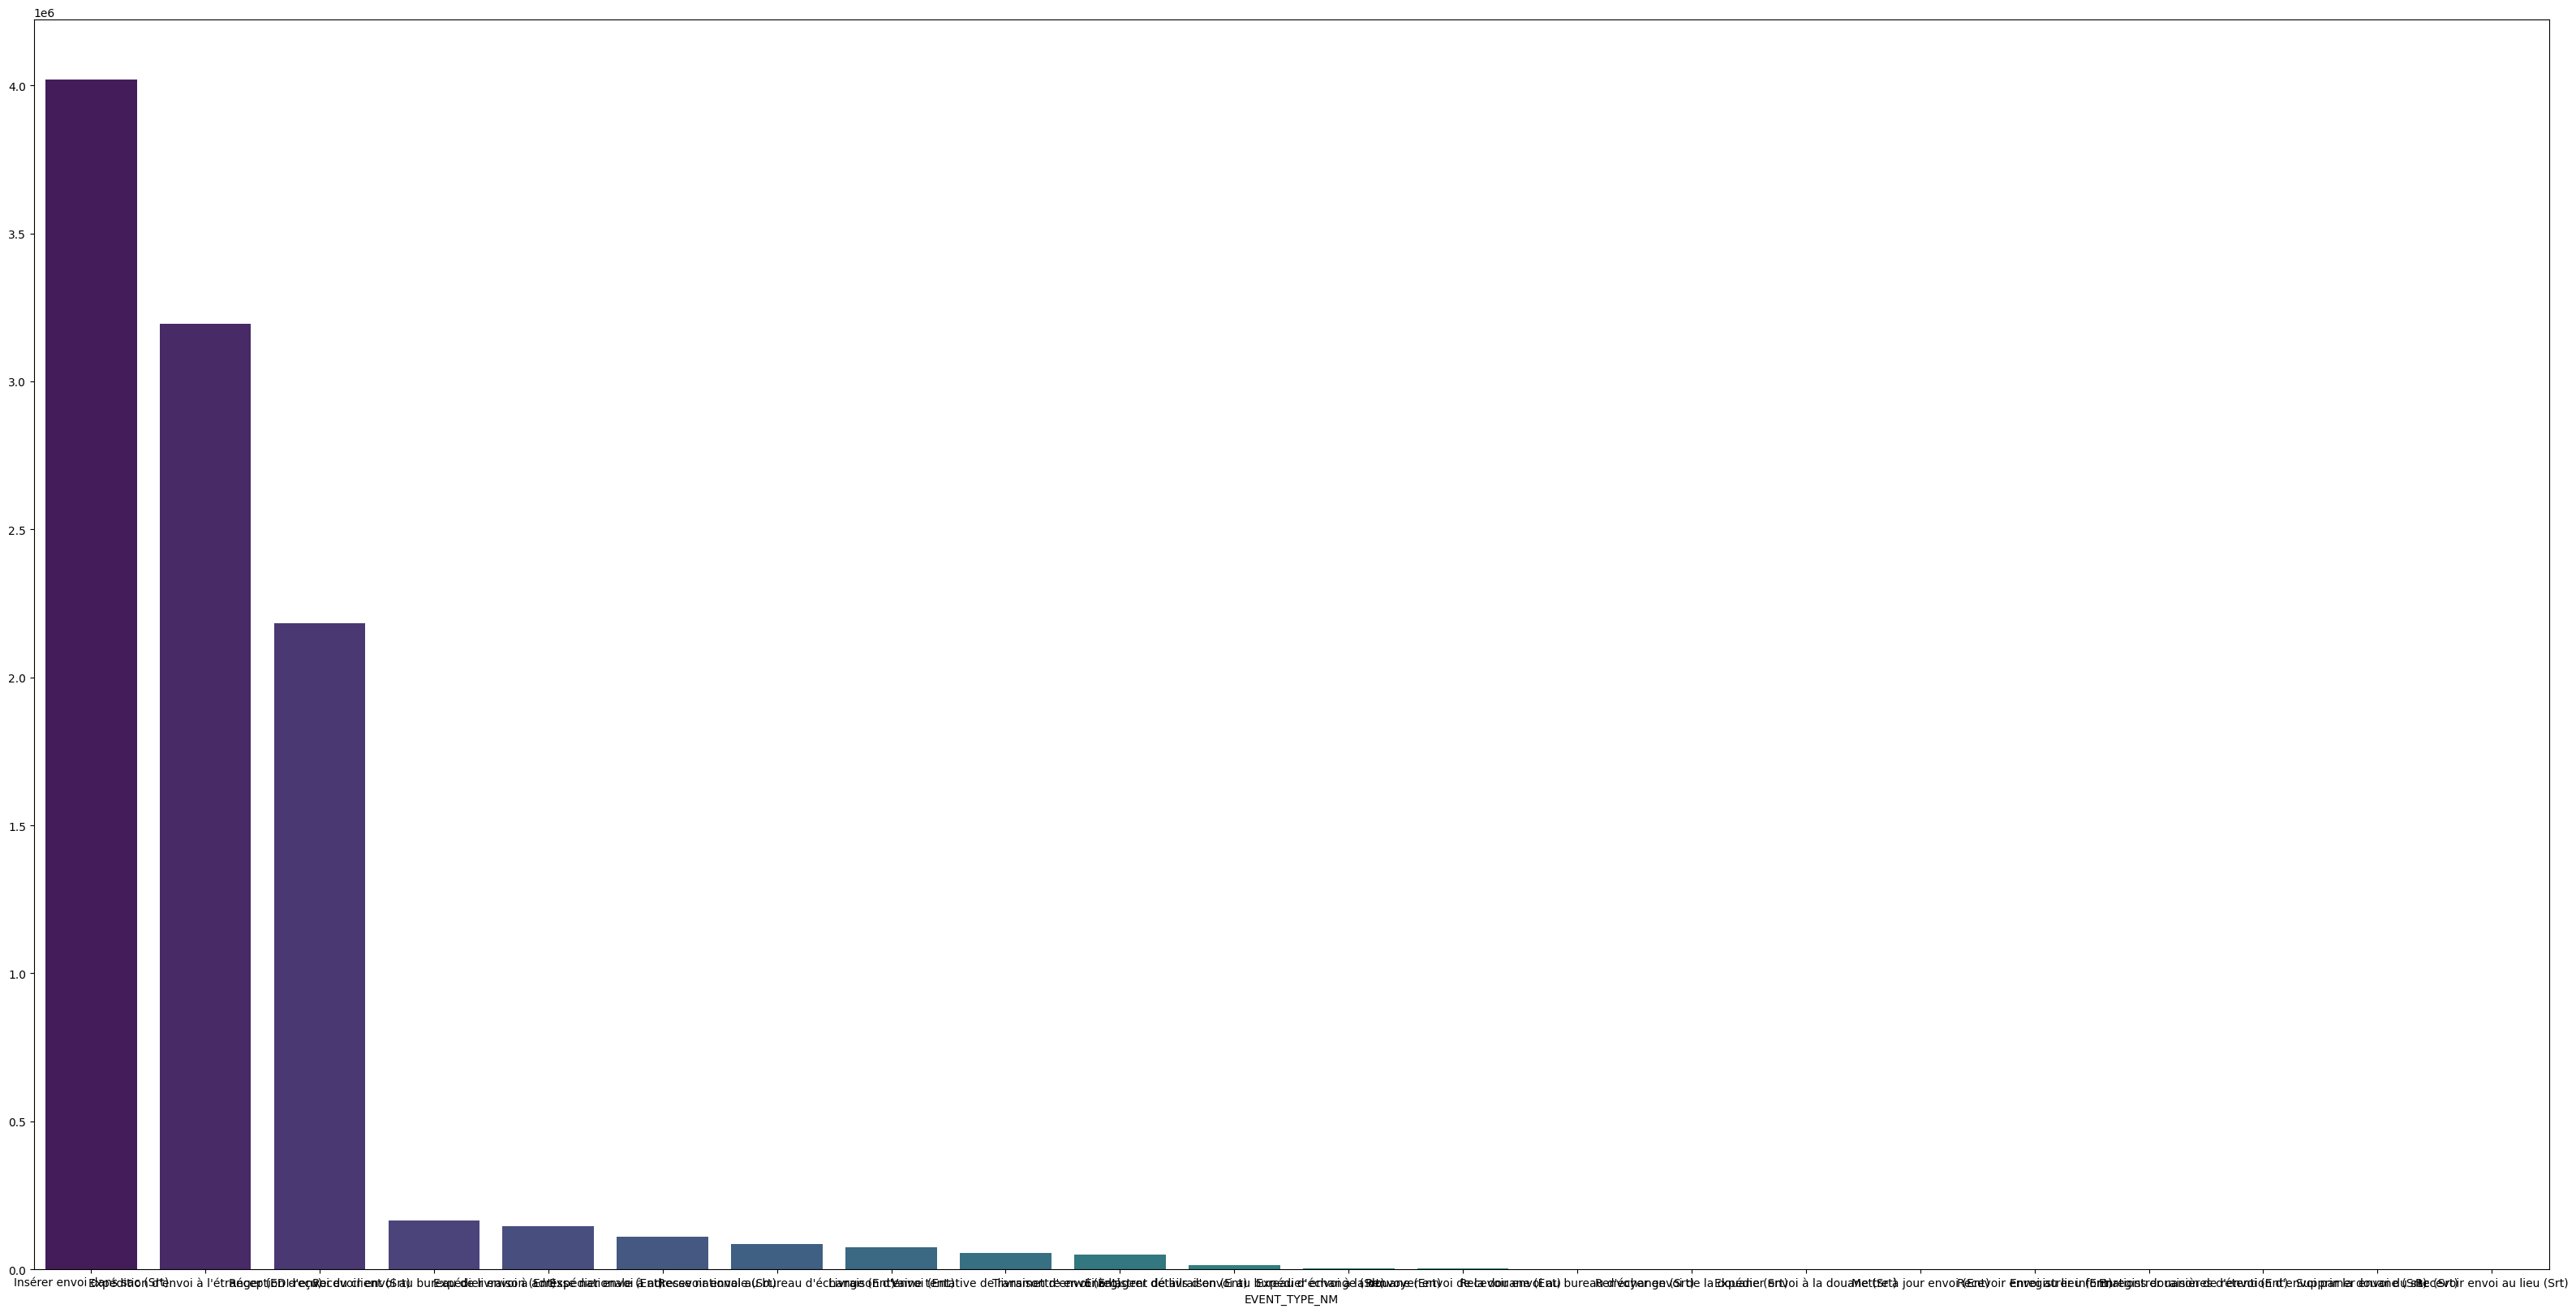

In [7]:

# Count the occurrences of each protocol
event_type = df['EVENT_TYPE_NM'].value_counts()

print(event_type)

# Visualize the counts of each protocol
plt.figure(figsize=(40, 20))
sns.barplot(x=event_type.index, y=event_type.values, palette='viridis')
plt.show()

In [8]:

# Count the occurrences of each protocol
proto_counts = df['établissement_postal'].value_counts()

print(proto_counts)


établissement_postal
ÉMIRATS ARABES UNIS      1497914
SINGAPOUR                1269696
TCHÈQUE, RÉPUBLIQUE       747902
PAYS-BAS                  638510
FRANCE                    444911
                          ...   
AGOUNI BOURAGH                 1
EL-AMRIA                       1
EL-KSEUR-AKAL-ABERKAN          1
CONGO                          1
AKHNAK                         1
Name: count, Length: 2702, dtype: int64


In [9]:
# Count the occurrences of each protocol
proto_counts = df['next_établissement_postal'].value_counts()

print(proto_counts)



next_établissement_postal
ALGÉRIE                      3194567
SECTION PAQUETS CPX ALGER      32589
ALGER GARE                     25376
CONSTANTINE COLIS POSTAUX      15638
ORAN COLIS POSTAUX             13474
                              ...   
OUED-FODDA                         1
OULED-FARES-CITE-UNI               1
BOUTRAK                            1
MAAOUIA                            1
AKHNAK                             1
Name: count, Length: 2536, dtype: int64


In [10]:
# Rows whose RECPTCL_FID is not NaN
rec_present = df[df["RECPTCL_FID"].notna()]

# Show the first five
rec_present.head()


,RECPTCL_FID,MAILITM_FID,EVENT_TYPE_NM,date,établissement_postal,EVENT_TYPE_CD,next_établissement_postal
6646090,AEDXBADZAAEDACN55029014100196,CP025561236AE,Expédition d'envoi à l'étranger (EDI-reçu),2025-03-21 14:25:00.000,ÉMIRATS ARABES UNIS,12,ALGÉRIE
6646091,AEDXBADZAAEDACN55029014100196,CP025562483AE,Expédition d'envoi à l'étranger (EDI-reçu),2025-03-21 14:25:00.000,ÉMIRATS ARABES UNIS,12,ALGÉRIE
6646092,AEDXBADZAAEDACN55029014100196,CP025571009AE,Expédition d'envoi à l'étranger (EDI-reçu),2025-03-21 14:25:00.000,ÉMIRATS ARABES UNIS,12,ALGÉRIE
6646093,AEDXBADZAAEDACN55029014100196,CP025571295AE,Expédition d'envoi à l'étranger (EDI-reçu),2025-03-21 14:25:00.000,ÉMIRATS ARABES UNIS,12,ALGÉRIE
6646094,AEDXBADZAAEDACN55029014100196,CP025577240AE,Expédition d'envoi à l'étranger (EDI-reçu),2025-03-21 14:25:00.000,ÉMIRATS ARABES UNIS,12,ALGÉRIE


In [5]:
# 1️⃣  Make sure the column is treated as text (protects against NaNs)
fid = df["MAILITM_FID"].astype("string")

# 2️⃣  Boolean mask: True if both trailing characters are letters (A-Z / a-z)
two_letter_suffix = fid.str[-2:].str.isalpha()

# --- Quick sanity check
print(two_letter_suffix.value_counts(dropna=False))
# True  : rows where the code ends in letters (e.g. "ES")
# False : rows where it ends in digits or something else
# <NA>  : rows where MAILITM_FID itself is missing


MAILITM_FID
True     10103602
False           3
Name: count, dtype: Int64


In [6]:
bad_suffix = df[~two_letter_suffix & fid.notna()]

print(f"Bad rows: {len(bad_suffix):,}")
bad_suffix.head()   # peek at the first few offenders



Bad rows: 3


,RECPTCL_FID,MAILITM_FID,EVENT_TYPE_NM,date,établissement_postal,EVENT_TYPE_CD,next_établissement_postal
8476066,FRCDGADZALGDAUN22292007000181,"L,100824739C~",Expédition d'envoi à l'étranger (EDI-reçu),2022-10-27 08:00:00.000,NaN,12,ALGÉRIE
8555400,FRCDGADZALGDAUN40405002000093,UL201108619 Q,Expédition d'envoi à l'étranger (EDI-reçu),2024-09-14 08:45:00.000,NaN,12,ALGÉRIE
8629029,ITLINADZALGDAUN40032001110020,RS0884969906Y,Expédition d'envoi à l'étranger (EDI-reçu),2024-02-07 10:30:00.000,NaN,12,ALGÉRIE


In [7]:
# Build the “good suffix” mask once
suffix_ok = (
    df["MAILITM_FID"]
      .astype("string")
      .str[-2:]
      .str.isalpha()
      .fillna(False)          # treat missing IDs as bad
)

df = df[suffix_ok]

# Quick confirmation
print(f"Rows left: {len(df):,}")
df.head()


Rows left: 10,103,602


,RECPTCL_FID,MAILITM_FID,EVENT_TYPE_NM,date,établissement_postal,EVENT_TYPE_CD,next_établissement_postal
0,NaN,CC021659473ES,Insérer envoi dans sac (Srt),2024-01-31 20:11:00.000,ESPAGNE,8,NaN
1,NaN,CC021662747ES,Réception d'envoi du client (Srt),2024-01-31 12:31:00.000,ESPAGNE,1,NaN
2,NaN,CC021662747ES,Insérer envoi dans sac (Srt),2024-02-05 12:46:00.000,ESPAGNE,8,NaN
3,NaN,CC021663328ES,Réception d'envoi du client (Srt),2024-01-31 13:51:00.000,ESPAGNE,1,NaN
4,NaN,CC021663328ES,Insérer envoi dans sac (Srt),2024-02-01 12:32:00.000,ESPAGNE,8,NaN


In [8]:
df['id'] = df["MAILITM_FID"].str[-2:]
df.head()

,RECPTCL_FID,MAILITM_FID,EVENT_TYPE_NM,date,établissement_postal,EVENT_TYPE_CD,next_établissement_postal,id
0,NaN,CC021659473ES,Insérer envoi dans sac (Srt),2024-01-31 20:11:00.000,ESPAGNE,8,NaN,ES
1,NaN,CC021662747ES,Réception d'envoi du client (Srt),2024-01-31 12:31:00.000,ESPAGNE,1,NaN,ES
2,NaN,CC021662747ES,Insérer envoi dans sac (Srt),2024-02-05 12:46:00.000,ESPAGNE,8,NaN,ES
3,NaN,CC021663328ES,Réception d'envoi du client (Srt),2024-01-31 13:51:00.000,ESPAGNE,1,NaN,ES
4,NaN,CC021663328ES,Insérer envoi dans sac (Srt),2024-02-01 12:32:00.000,ESPAGNE,8,NaN,ES


In [9]:

# Count the occurrences of each protocol
proto_counts = df['id'].value_counts()

print(proto_counts)

s = proto_counts


id
SG    3508380
CZ    2066439
AE    1513532
NL    1373813
FR     552759
       ...   
GY          1
PA          1
TV          1
gA          1
XX          1
Name: count, Length: 156, dtype: int64


In [16]:
# Map the Series index using the country_dict
s.index = s.index.map(lambda code: country_dict.get(code, code))  # Keep unmapped codes as-is
print(s)

id
SINGAPOUR              3508380
TCHÈQUE, RÉPUBLIQUE    2066439
ÉMIRATS ARABES UNIS    1513532
PAYS-BAS               1373813
FRANCE                  552759
                        ...   
GUYANA                       1
PANAMA                       1
TUVALU                       1
gA                           1
XX                           1
Name: count, Length: 156, dtype: int64


In [17]:
print("Min date:", df["date"].min())
print("Max date:", df["date"].max())

Min date: 2017-03-13 08:31:10.210
Max date: 2025-05-21 15:21:05.000


In [10]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d %H:%M:%S.%f")
# Sort by ID and date
df = df.sort_values(by=["MAILITM_FID", "date"])

# Calculate time to next step
df["duration_to_next_step"] = df.groupby("MAILITM_FID")["date"].shift(-1) - df["date"]

# Calculate total duration per ID
first_date = df.groupby("MAILITM_FID")["date"].transform("first")
last_date = df.groupby("MAILITM_FID")["date"].transform("last")
df["total_duration"] = last_date - first_date

# Preview the updated dataset
df[["MAILITM_FID", "date", "EVENT_TYPE_NM", "duration_to_next_step", "total_duration"]].head(10)


,MAILITM_FID,date,EVENT_TYPE_NM,duration_to_next_step,total_duration
2723,CA000020800LY,2022-02-03 10:19:00,Insérer envoi dans sac (Srt),6 days 22:15:00,6 days 22:15:00
2724,CA000020800LY,2022-02-10 08:34:00,Insérer envoi dans sac (Srt),NaT,6 days 22:15:00
2725,CA000020844RU,2024-12-10 16:40:00,Réception d'envoi du client (Srt),NaT,0 days 00:00:00
2726,CA000086085US,2024-11-16 00:31:00,Réception d'envoi du client (Srt),8 days 08:07:00,8 days 08:07:00
2727,CA000086085US,2024-11-24 08:38:00,Insérer envoi dans sac (Srt),NaT,8 days 08:07:00
2728,CA000094303US,2024-11-18 11:00:00,Réception d'envoi du client (Srt),3 days 05:53:00,3 days 05:53:00
2729,CA000094303US,2024-11-21 16:53:00,Insérer envoi dans sac (Srt),NaT,3 days 05:53:00
2730,CA000102985US,2024-11-21 14:39:00,Réception d'envoi du client (Srt),1 days 00:21:00,1 days 00:21:00
2731,CA000102985US,2024-11-22 15:00:00,Insérer envoi dans sac (Srt),NaT,1 days 00:21:00
2732,CA000132868US,2024-11-27 13:56:00,Réception d'envoi du client (Srt),2 days 11:32:00,2 days 11:32:00


In [9]:
df.to_csv("df_with_durations_01.csv", index=False, encoding='utf-8-sig')

In [10]:
print("no zervo duration", 10103602 - 1712240)

no zervo duration 8391362


In [23]:
# Filter rows where total_duration is NOT zero
zero_duration_df = df[df["total_duration"] == pd.Timedelta(0)]

# Display the first few rows as a check
zero_duration_df.shape


(1712240, 10)

In [24]:

# Count the occurrences of each protocol
countries = zero_duration_df['id'].value_counts()

print(countries)


id
SG    1132933
AE     365784
CN      97386
NL      22323
CZ      17694
       ...   
AO          1
DJ          1
FO          1
UY          1
ZA          1
Name: count, Length: 135, dtype: int64


In [25]:
# Map the Series index using the country_dict
countries.index = countries.index.map(lambda code: country_dict.get(code, code))  
print(countries)

id
SINGAPOUR              1132933
ÉMIRATS ARABES UNIS     365784
CHINE                    97386
PAYS-BAS                 22323
TCHÈQUE, RÉPUBLIQUE      17694
                        ...   
ANGOLA                       1
DJIBOUTI                     1
FÉROÉ, ÎLES                  1
URUGUAY                      1
AFRIQUE DU SUD               1
Name: count, Length: 135, dtype: int64


In [26]:
# Step 1: Count how many times each ID appears
id_counts = zero_duration_df["MAILITM_FID"].value_counts()

# Step 2: Count how many IDs have a specific count
count_of_counts = id_counts.value_counts().sort_index()

print(count_of_counts)


count
1    1705755
2       3211
3         17
4          3
Name: count, dtype: int64


In [27]:
ids_with_0 = id_counts[id_counts == 1].index
df_with_0 = df[df["MAILITM_FID"].isin(ids_with_0)]
df_with_0.head(20)

,RECPTCL_FID,MAILITM_FID,EVENT_TYPE_NM,date,établissement_postal,EVENT_TYPE_CD,next_établissement_postal,id,duration_to_next_step,total_duration
2725,NaN,CA000020844RU,Réception d'envoi du client (Srt),2024-12-10 16:40:00,"RUSSIE, FÉDÉRATION DE",1,NaN,RU,NaT,0 days
2768,NaN,CA000306674TG,Réception d'envoi du client (Srt),2023-04-20 12:14:00,NaN,1,NaN,TG,NaT,0 days
2788,NaN,CA000631038US,Insérer envoi dans sac (Srt),2025-03-12 21:28:00,ÉTATS-UNIS,8,NaN,US,NaT,0 days
2894,NaN,CA001003839US,Réception d'envoi du client (Srt),2025-04-18 15:34:00,ÉTATS-UNIS,1,NaN,US,NaT,0 days
2910,NaN,CA001056995US,Réception d'envoi du client (Srt),2025-04-25 12:39:00,ÉTATS-UNIS,1,NaN,US,NaT,0 days
3066,NaN,CA001285128JE,Réception d'envoi du client (Srt),2024-10-08 23:37:00,NaN,1,NaN,JE,NaT,0 days
8408215,FRCDGADZALGBACN50045001000079,CA001425275BF,Expédition d'envoi à l'étranger (EDI-reçu),2025-04-05 15:30:00,BURKINA FASO,12,ALGÉRIE,BF,NaT,0 days
3154,NaN,CA001498423PT,Insérer envoi dans sac (Srt),2023-05-05 13:04:00,PORTUGAL,8,NaN,PT,NaT,0 days
7624520,ATVIEBDZALGBACN40148002100114,CA004507190AT,Expédition d'envoi à l'étranger (EDI-reçu),2024-12-20 15:15:00,AUTRICHE,12,ALGÉRIE,AT,NaT,0 days
7615482,ATVIEBDZALGBACN30042001000088,CA006206192AT,Expédition d'envoi à l'étranger (EDI-reçu),2023-04-05 17:50:00,NaN,12,ALGÉRIE,AT,NaT,0 days


In [28]:

# Count the occurrences of each protocol
event_type = df_with_0['EVENT_TYPE_NM'].value_counts()

print(event_type)



EVENT_TYPE_NM
Insérer envoi dans sac (Srt)                  1155447
Expédition d'envoi à l'étranger (EDI-reçu)     537973
Réception d'envoi du client (Srt)               12335
Name: count, dtype: int64
